In [ ]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [6]:
# change to dataset's path as you wish
os.chdir('/..')

In [7]:
# access and integrate the data into pd.DataFrame format
import glob

# return a list of sorted .gz file
Myfiles = [f for f in glob.glob('*.gz')]
Myfiles.sort()

# return a list of .csv file
df = []
for files in Myfiles:
    file = pd.read_csv(files, sep=' ',header=None)
    df.append(file)

# choose the first 50 .csv files, select column and change the column name
files_concat = pd.concat(df[:50],  ignore_index=True)
files_concat = files_concat[[3,7]]
files_concat.columns = ['summary', 'text']
files_concat

,summary,text
0,this invention relates to novel calcium phosph...,throughout the following description specific ...
1,"a stapler , particularly for suturing skin wou...",preferred embodiments of the invention are ill...
2,a nerve guidance conduit includes a spiral str...,embodiments of the present invention provide n...
3,a rail connector and improvement in seat base ...,"referring now to the drawings , and particular..."
4,an anvil assembly is disclosed that includes a...,exemplary embodiments of the presently disclos...
...,...,...
52229,a transcutaneous electric nerve stimulator ele...,the basic construction of electrodes for use i...
52230,an apparatus for removing a sheath from a syri...,apparatus will now be described that enables t...
52231,a wearable load supporting system has a rigid ...,"referring more particularly to fig1 - 5 , wher..."
52232,this protection covers the process for prepari...,this product is a medicament . since it consis...


In [8]:
# word_count_lists for both texts and summaries
word_text = []
word_summary = []
for i in range(len(files_concat)):
  word_text.append(len(files_concat['text'][i].split()))
  word_summary.append(len(files_concat['summary'][i].split()))

In [9]:
len(word_text)

52234

<function matplotlib.pyplot.show>

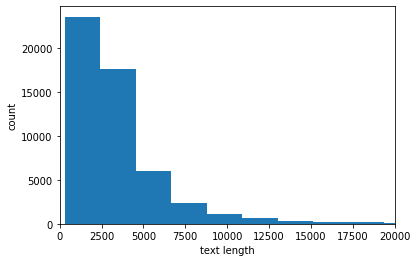

In [10]:
import matplotlib.pyplot as plt
plt.hist(word_text, bins=50)
plt.xlim((0,20000))
plt.xlabel('text length')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show>

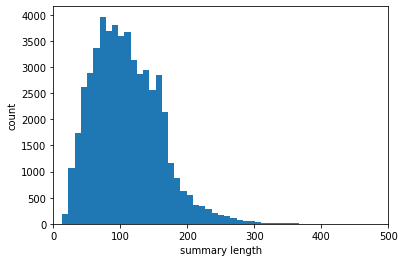

In [11]:
plt.hist(word_summary, bins=50)
plt.xlim((0,500))
plt.xlabel('summary length')
plt.ylabel('count')
plt.show

In [12]:
# include only texts with text_length <= 4000 and summary_length <=200
index_list = []
for i in range(len(files_concat)):
  count_text = len(files_concat['text'][i].split())
  count_summary = len(files_concat['summary'][i].split())
  if  count_text <= 4000 and count_summary <=200:
    index_list.append(i)

df = files_concat.iloc[index_list]
df.reset_index(inplace = True) 

# select only the first 5000 samples
df_ = df[:5000]

In [15]:
df_

,index,summary,text
0,1,"a stapler , particularly for suturing skin wou...",preferred embodiments of the invention are ill...
1,3,a rail connector and improvement in seat base ...,"referring now to the drawings , and particular..."
2,4,an anvil assembly is disclosed that includes a...,exemplary embodiments of the presently disclos...
3,6,the invention concerns a highly concentrated m...,1 indicates the tank containing the mixture of...
4,7,an automatic electro - mechanical device for o...,illustrated in fig1 and 3 is the exterior box ...
...,...,...,...
4995,6991,an inflatable chain intended for use in bathin...,the invention chair is intended to be position...
4996,6992,an improved method of using a convertible bowl...,an exemplary embodiment of a bowling lane made...
4997,6995,a device and method for monitoring the ph valu...,fig1 shows the apparatus of the preferred embo...
4998,6996,a hair drying apparatus consists of a curved r...,the above and other objects and features of th...


In [13]:
# shuffle and split data, set the random state as 42
train, test = train_test_split(df_,test_size=0.1,shuffle=True, random_state=42) 

print("Train dataset length: "+str(len(train)))
print("Test dataset length: "+ str(len(test)))

Train dataset length: 4500
Test dataset length: 500
